In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
%matplotlib inline

In [2]:
data = pd.read_csv('athlete_events.csv')
data
data.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
print("Determining Attributes are ",list(data))

Determining Attributes are  ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


<h3> Best Performing countries of all time<h3>

Top performer countries 
        NOC
USA  18853
FRA  12758
GBR  12256
ITA  10715
GER   9830


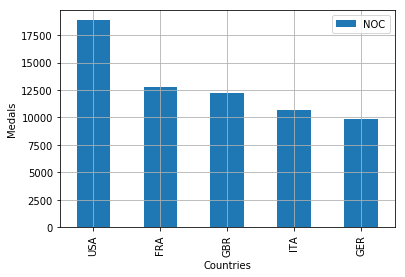

In [69]:
country_names = data['NOC']
medal_counts = country_names.value_counts()
medal_counts =pd.DataFrame(medal_counts)
top_countries=medal_counts.head(5)
top_countries.plot.bar()
plt.xlabel('Countries')
plt.ylabel('Medals')
print("Top performer countries \n",medal_counts.head(5))
plt.grid('True')




In [82]:
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


<h3> Best Performing players of all time<h3>

Top performer players 
                           Name
Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Ioannis Theofilakis         36
Takashi Ono                 33


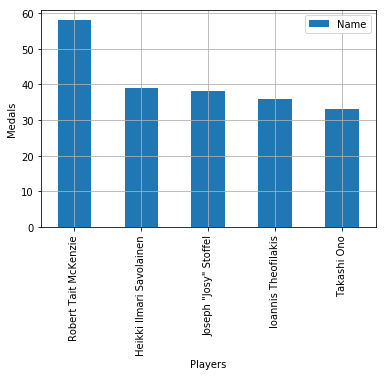

In [42]:
players = data['Name']
medal_counts = players.value_counts()
medal_counts =pd.DataFrame(medal_counts)
top_players=medal_counts.head(5)
top_players.plot.bar()
plt.xlabel('Players')
plt.ylabel('Medals')

print("Top performer players \n",medal_counts.head(5))
plt.grid('True')


<h3> Best Performing countries on individual basis<h3>

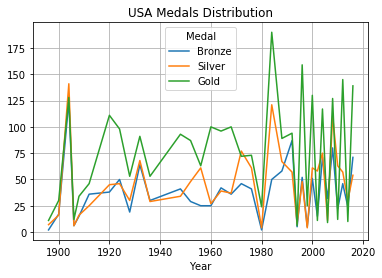

In [41]:
usa=data.NOC == 'USA' 
usa_grp= data[usa].groupby(['Year','Medal'])
usa_grp['Name'].count().head()
usa_medals=usa_grp['Name'].count().unstack()
usa_medals.head(10)
usa_medals.plot(kind='line')
plt.title('USA Medals Distribution')
plt.grid('True')

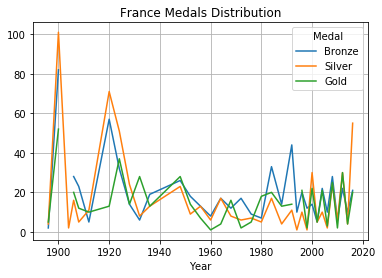

In [44]:
france=data.NOC == 'FRA' 
france_grp= data[france].groupby(['Year','Medal'])
france_grp['Name'].count().head()
france_medals=france_grp['Name'].count().unstack()
france_medals.head(10)
france_medals.plot(kind='line')
plt.title('France Medals Distribution')
plt.grid('True')

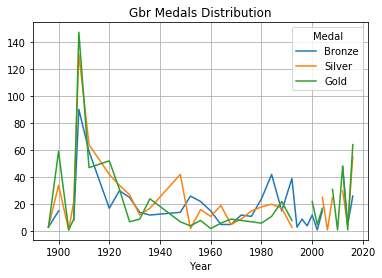

In [45]:
GBR=data.NOC == 'GBR' 
GBR_grp= data[GBR].groupby(['Year','Medal'])
GBR_grp['Name'].count().head()
GBR_medals=GBR_grp['Name'].count().unstack()
GBR_medals.head(10)
GBR_medals.plot(kind='line')
plt.title('Gbr Medals Distribution')
plt.grid('True')

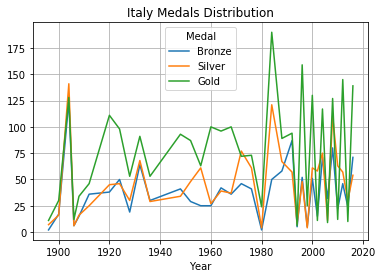

In [46]:
ITA=data.NOC == 'ITA' 
ITA_grp= data[usa].groupby(['Year','Medal'])
ITA_grp['Name'].count().head()
ITA_medals=ITA_grp['Name'].count().unstack()
ITA_medals.head(10)
ITA_medals.plot(kind='line')
plt.title('Italy Medals Distribution')
plt.grid('True')

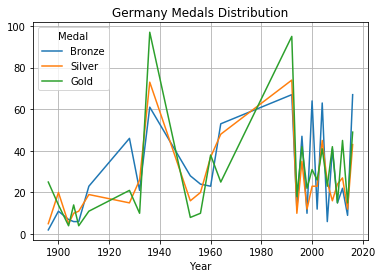

In [47]:
GER=data.NOC == 'GER' 
GER_grp= data[GER].groupby(['Year','Medal'])
GER_grp['Name'].count().head()
GER_medals=GER_grp['Name'].count().unstack()
GER_medals.head(10)
GER_medals.plot(kind='line')
plt.title('Germany Medals Distribution')
plt.grid('True')

In [56]:
games = data['Sport']
medal_counts = games.value_counts()
print("Most victorious sports\n",medal_counts.head(5))

Most victorious sports
 Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


<h3> Male vs Female<h3>

In [92]:
players_gender = data['Sex']
medal_counts = players_gender.value_counts()
print("Male vs Female players\n",medal_counts.head())

Male vs Female players
 M    196594
F     74522
Name: Sex, dtype: int64


In [81]:
gender=data.Sex 
gender_grp= data[USA].groupby(['Year','Sex','Medal'])
gender_grp['Name'].count().head(24)
gender_medals=gender_grp['Name'].count().unstack()
gender_medals.head(10)

Medal     Bronze   Gold  Silver
Year Sex                       
1896 M       2.0   11.0     7.0
1900 F       3.0    1.0     1.0
     M      14.0   29.0    15.0
1904 F       2.0    6.0     2.0
     M     123.0  122.0   139.0
1906 M       6.0   12.0     6.0
1908 M      15.0   34.0    16.0
1912 M      36.0   46.0    25.0
1920 F       4.0    7.0     3.0
     M      34.0  104.0    42.0

Medal  Bronze  Silver  Gold
Year                       
1900        5       4     4
1904        2       2     6
1906        2       2     2
1908        5       5     6
1912       10      10    10


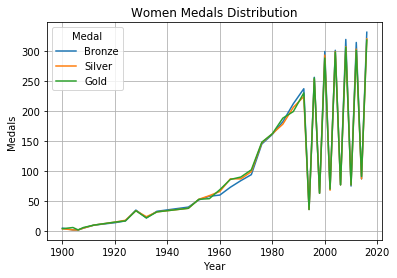

In [55]:
data.Medal = pd.Categorical(values = data.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

females = data[data.Sex == 'F']

# Group usa by 'Edition', 'Medal', and 'Athlete'
female_medals_by_year = females.groupby(['Year', 'Medal'])['Name'].count()

# Reshape usa_medals_by_year by unstacking
female_medals_by_year = female_medals_by_year.unstack(level='Medal')

print(female_medals_by_year.head())

# Create an area plot of usa_medals_by_year
female_medals_by_year.plot()
plt.title('Women Medals Distribution')
plt.ylabel('Medals')
plt.grid('True')
plt.show()

Medal  Bronze  Silver  Gold
Year                       
1896       38      43    62
1900      170     224   197
1904      148     161   167
1906      143     154   155
1908      251     276   288


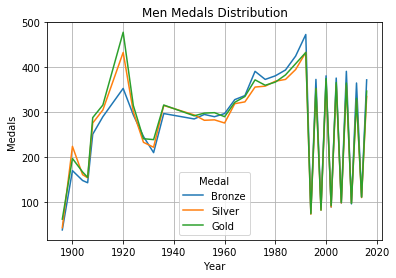

In [56]:
data.Medal = pd.Categorical(values = data.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

males = data[data.Sex == 'M']

# Group usa by 'Edition', 'Medal', and 'Athlete'
male_medals_by_year = males.groupby(['Year', 'Medal'])['Name'].count()

# Reshape usa_medals_by_year by unstacking
male_medals_by_year = male_medals_by_year.unstack(level='Medal')

print(male_medals_by_year.head())

# Create an area plot of usa_medals_by_year
male_medals_by_year.plot()
plt.title('Men Medals Distribution')
plt.ylabel('Medals')
plt.grid('True')
plt.show()

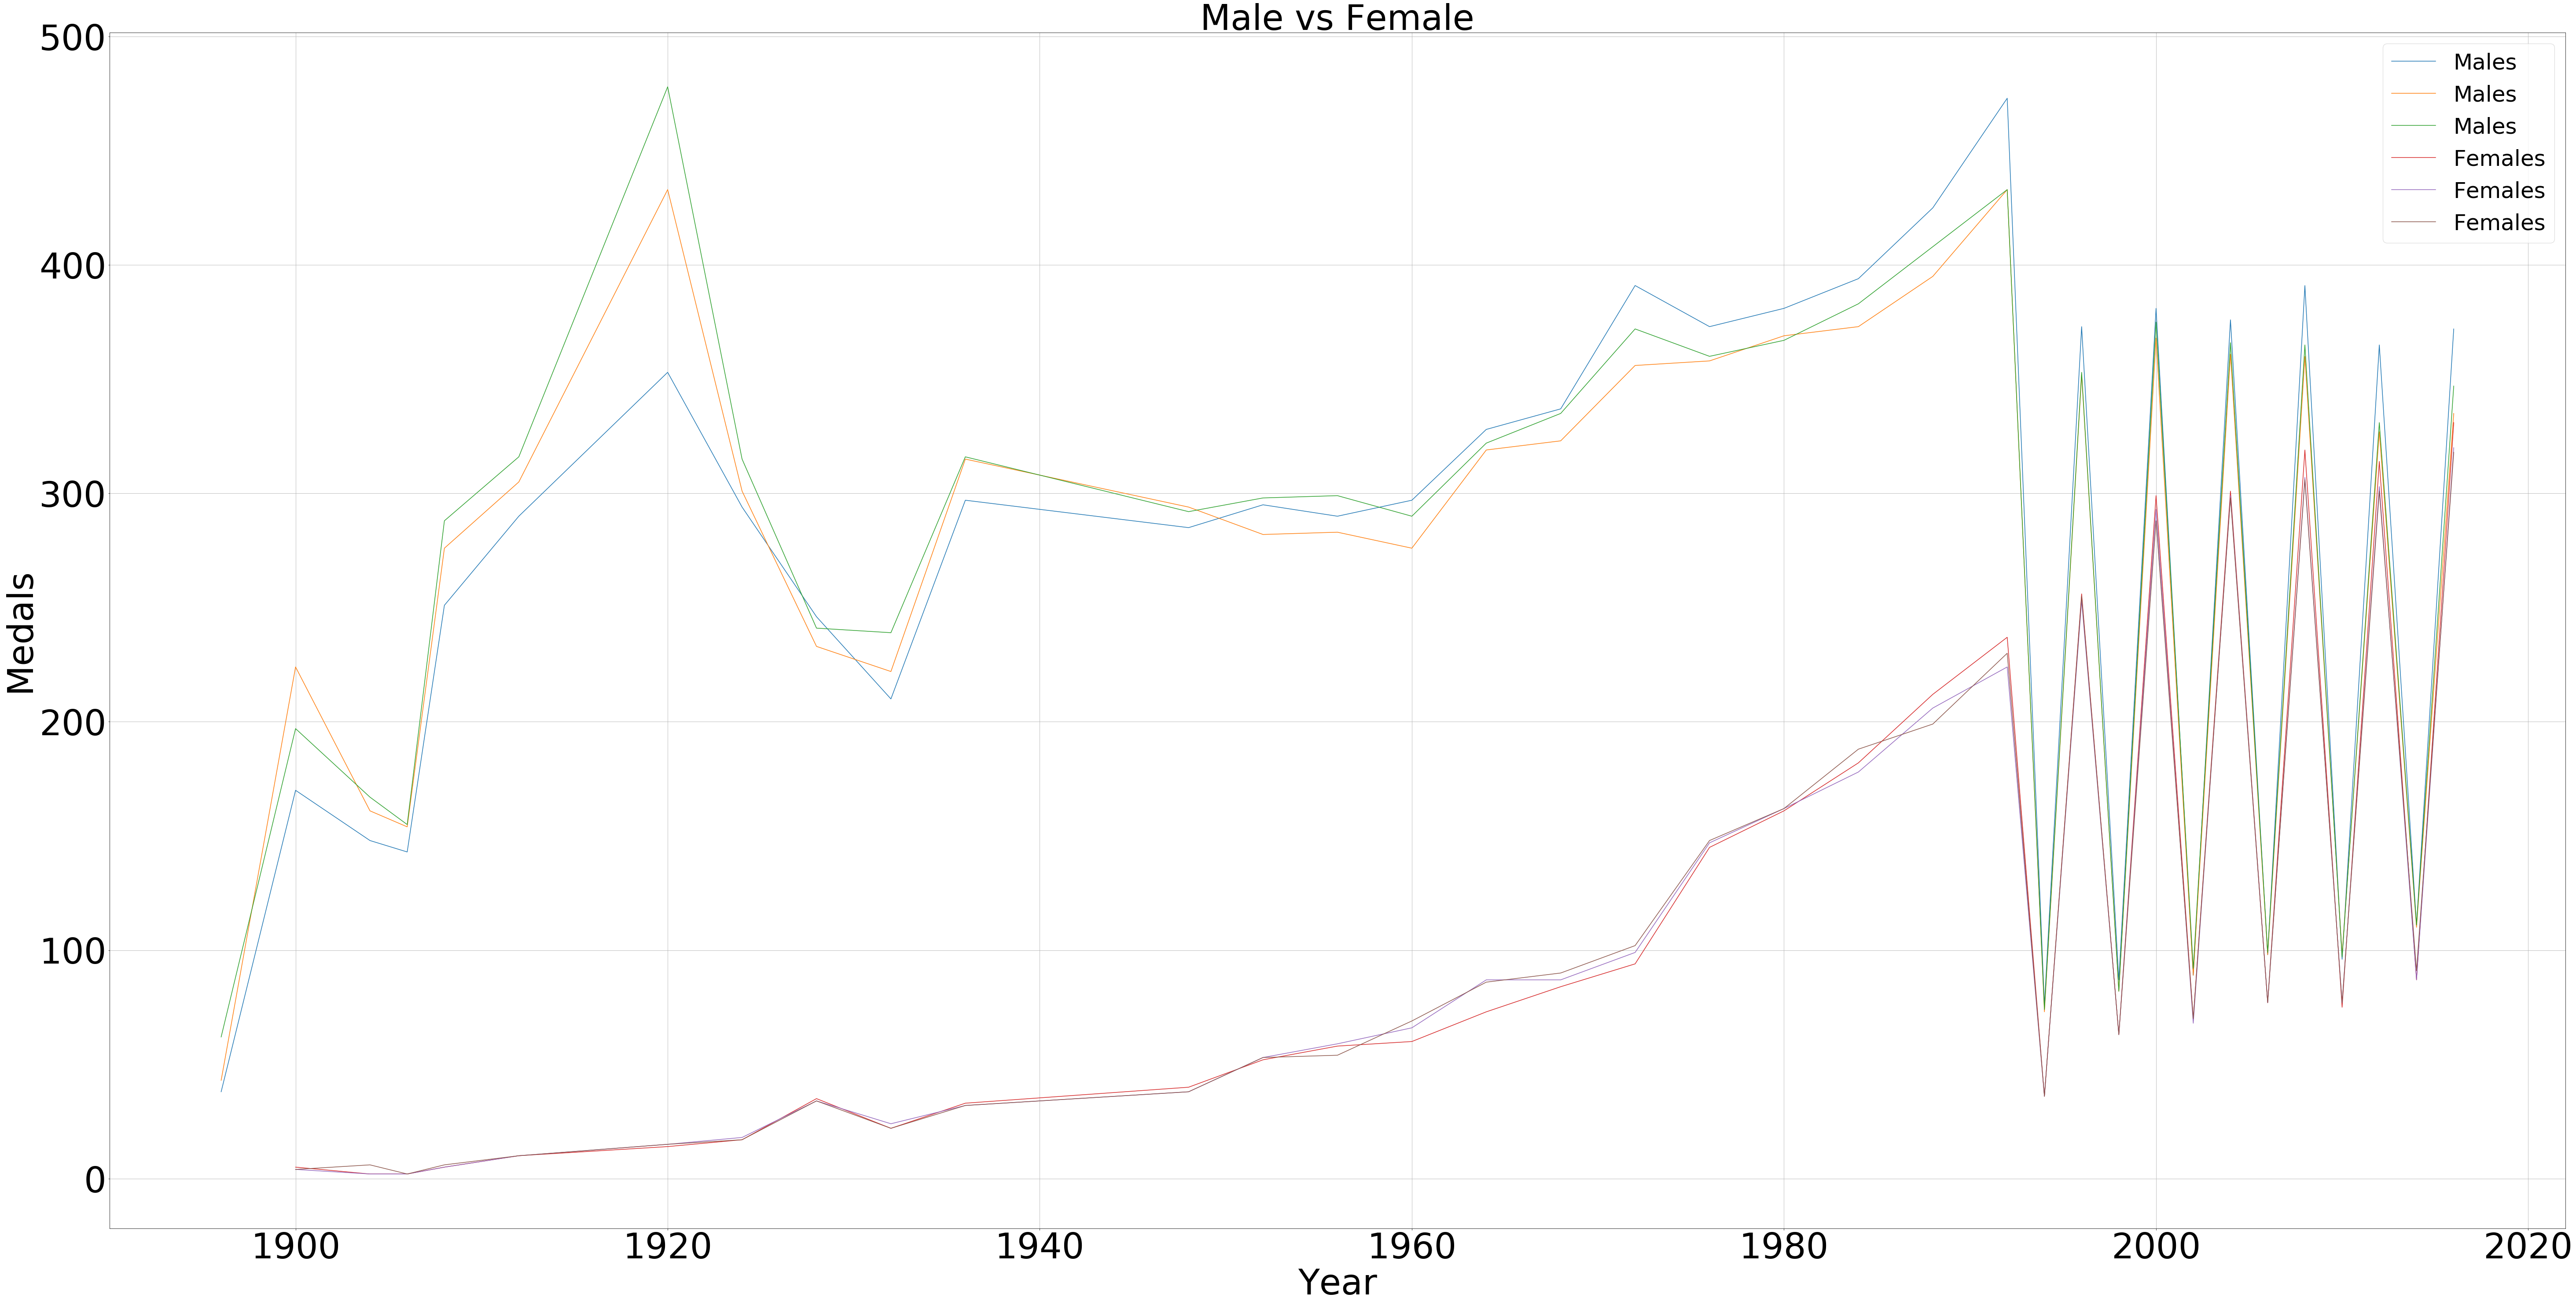

In [53]:
fig, ax = plt.subplots(figsize = (100,50))
ax.plot(male_medals_by_year , label = 'Males',alpha=3.0)
ax.plot(female_medals_by_year, label = 'Females',alpha=3.0)

plt.xticks(fontsize=80)
plt.yticks(fontsize=80)

ax.set_ylabel('Medals',size=80, fontsize=80)
ax.set_xlabel('Year',size=80)
ax.set_title('Male vs Female',size=80)
ax.legend()
plt.legend(prop={'size':50})
plt.grid('True')
plt.show()
